# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import datetime

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Во-первых, для воспроизводимости результатов (т.е. при перезапуске ноутбука результаты будут такие же, все функции/методы, где есть случайный элемент будут работать одинакого). Во-вторых, для удобства проверки. Поскольку фиксация идет в самом начале, то все ячейки в ноутбуке будут фиксированы одинаково у всех студентов курса. так можно будет сравнить результаты между студентами.")

Во-первых, для воспроизводимости результатов (т.е. при перезапуске ноутбука результаты будут такие же, все функции/методы, где есть случайный элемент будут работать одинакого). Во-вторых, для удобства проверки. Поскольку фиксация идет в самом начале, то все ячейки в ноутбуке будут фиксированы одинаково у всех студентов курса. так можно будет сравнить результаты между студентами.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape) #стоимость машин оценена экспертами рынка
print("Test data shape: ", df_test.shape) #известны реальные цены

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

`mileage` - расход топлива (км/л)  
`engine` - объем двигателя (см3)  
`max_power` - (л.с.)  
`km_driven` - пробег (км)

In [4]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head(n=5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail(n=5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
# числовые столбцы
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
# категориальные столбцы
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
# на df_train
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [10]:
# на df_test
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

**Ответ**: в обоих датасетах есть пропуски в колонках `mileage`, `engine`, `max_power`, `torque`, `seats`. Однако их доля не очень большая.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
# если смотреть без таргета
X_train = df_train.drop('selling_price', axis=1)
sum(X_train.duplicated())

1159

In [12]:
# если смотртеь с таргетом
sum(df_train.duplicated())

985

**Ответ**: да есть, суммарно 985 дубликата.

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
# без таргета
X_train[X_train.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [14]:
# с таргетом
df_train[df_train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


**Ответ**: как видно, дублируются разные строки.

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [15]:
X_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6994    False
6995    False
6996    False
6997     True
6998     True
Length: 6999, dtype: bool

In [16]:
df_train = df_train[~X_train.duplicated()]
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [17]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [18]:
df_train.reset_index(inplace=True, drop=True)

In [19]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

In [20]:
# train

In [21]:
df_train.loc[0, 'mileage']

'23.4 kmpl'

In [22]:
for i in range(len(df_train)):
    try:
        num = df_train.loc[i, 'mileage'].split()
        df_train.loc[i, 'mileage'] = float(num[0])
    except:
        df_train.loc[i, 'mileage'] = None


for i in range(len(df_train)):
    try:
        num = df_train.loc[i, 'engine'].split()
        df_train.loc[i, 'engine'] = float(num[0])
    except:
        df_train.loc[i, 'engine'] = None


for i in range(len(df_train)):
    try:
        num = df_train.loc[i, 'max_power'].split()
        df_train.loc[i, 'max_power'] = float(num[0])
    except:
        df_train.loc[i, 'max_power'] = None

df_train['mileage'] = df_train['mileage'].astype(float)
df_train['engine'] = df_train['engine'].astype(float)
df_train['max_power'] = df_train['max_power'].astype(float)

df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [23]:
# test

In [24]:
for i in range(len(df_test)):
    try:
        num = df_test.loc[i, 'mileage'].split()
        df_test.loc[i, 'mileage'] = float(num[0])
    except:
        df_test.loc[i, 'mileage'] = None

        
for i in range(len(df_test)):
    try:
        num = df_test.loc[i, 'engine'].split()
        df_test.loc[i, 'engine'] = float(num[0])
    except:
        df_test.loc[i, 'engine'] = None

        
for i in range(len(df_test)):
    try:
        num = df_test.loc[i, 'max_power'].split()
        df_test.loc[i, 'max_power'] = float(num[0])
    except:
        df_test.loc[i, 'max_power'] = None

        
df_test['mileage'] = df_test['mileage'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [25]:
pd.set_option('display.max_rows', None)
df_train['torque']

0                    190Nm@ 2000rpm
1               250Nm@ 1500-2500rpm
2          22.4 kgm at 1750-2750rpm
3             11.5@ 4,500(kgm@ rpm)
4                 113.75nm@ 4000rpm
5              7.8@ 4,500(kgm@ rpm)
6                     59Nm@ 2500rpm
7               170Nm@ 1800-2400rpm
8                    160Nm@ 2000rpm
9                    248Nm@ 2250rpm
10                    78Nm@ 4500rpm
11                   190Nm@ 2000rpm
12                              NaN
13                    84Nm@ 3500rpm
14              115Nm@ 3500-3600rpm
15         22.4 kgm at 1750-2750rpm
16                    62Nm@ 3000rpm
17            219.7Nm@ 1500-2750rpm
18                   160Nm@ 2000rpm
19                   200Nm@ 1750rpm
20                   190Nm@ 2000rpm
21                   200Nm@ 1750rpm
22                   115Nm@ 4000rpm
23                    69Nm@ 3500rpm
24                 172.5Nm@ 1750rpm
25                    84Nm@ 3500rpm
26                    59Nm@ 2500rpm
27                   200Nm@ 

In [26]:
pd.set_option('display.max_rows', 10)

Задача состоит в разделении колонки torque на две `torque` (крутящийся момент) и `max_torque_rpm` (обороты)
Проанализировав колонку torque было отмечено следующее:
- крутящийся момент встречается в разных единицах измерения: Nm и kgm; перевод из kgm в Nm можно сделать по следующей формуле: kgm * g = kgm * 9.8 = Nm
- оброты могут быть записаны в следующем виде:
   * '3000+/-500' - тогда расчет производится как 3000+500 = 3500 (т.е. берем максимум)
   * '2000-2500' - тогда берем верхнюю границу (т.е. 2500)
- есть данные без единиц измерения (например:  '510@ 1600-2400' или '210 / 1900'); в этом случае было решено, что они измеряются в Nm и kgm соответственно
- есть значения nan
- может быть указана только одна из величин (либо крутящийся момент, либо обороты)
- значение оборотов модет записываться через запятую, отделяющую тысячи (например: '4,500')

In [27]:
# для train
torque = []
max_torque_rpm = []

In [28]:
for i in range(len(df_train['torque'])):
    if (str(df_train['torque'][i]) != 'nan'):
        cond0 = re.findall(r'\+', df_train['torque'][i])
        if cond0 == []:
            nums = re.findall(r'\d+[.,\']\d+|\d+', df_train['torque'][i])
            cond1 = re.findall(r'kgm|KGM|Kgm', df_train['torque'][i])
            cond2 = re.findall(r'Nm|nm|NM', df_train['torque'][i])
            cond3 = re.findall(r'rpm|RPM|Rpm', df_train['torque'][i])
            cond_len = len(nums)
            if (cond2 != []) and (cond3 != []) and (cond_len == 2):
                torque.append(nums[0])
                max_torque_rpm.append(nums[1])
            elif (cond2 != []) and (cond3 != []) and (cond_len == 3):
                torque.append(nums[0])
                max_torque_rpm.append(nums[2])
            elif (cond1 != []) and (cond3 != []) and (cond_len == 2):
                torque.append(float(nums[0]) * 9.8)
                max_torque_rpm.append(nums[1])
            elif (cond1 != []) and (cond3 != []) and (cond_len == 3):
                torque.append(float(nums[0]) * 9.8)
                max_torque_rpm.append(nums[2])
            
            elif (cond2 == []) and (cond3 != []) and (cond1 == []) and (cond_len == 1):
                torque.append(None)
                max_torque_rpm.append(nums[0])
            elif (cond2 == []) and (cond3 != []) and (cond1 == []) and (cond_len == 2):
                torque.append(None)
                max_torque_rpm.append(nums[1])
            elif (cond2 == []) and (cond3 != []) and (cond1 == []) and (cond_len == 3):
                torque.append(nums[0])
                max_torque_rpm.append(nums[2])
            
            elif (cond2 != []) and (cond3 == []) and (cond1 == []) and (cond_len == 1):
                torque.append(nums[0])
                max_torque_rpm.append(None)
            elif (cond2 != []) and (cond3 == []) and (cond1 == []) and (cond_len == 2):
                torque.append(nums[1])
                max_torque_rpm.append(None)
            
            elif (cond2 == []) and (cond3 == []) and (cond1 != []) and (cond_len == 1):
                torque.append(float(nums[0]) * 9.8)
                max_torque_rpm.append(None)
            elif (cond1 == []) and (cond3 == []) and (cond1 != []) and (cond_len == 2):
                torque.append(float(nums[1]) * 9.8)
                max_torque_rpm.append(None)
            
            elif (cond1 == []) and (cond3 == []) and (cond1 == []) and (cond_len == 2):
                torque.append(nums[0])
                max_torque_rpm.append(nums[1])            
            elif (cond1 == []) and (cond3 == []) and (cond1 == []) and (cond_len == 3):
                torque.append(nums[0])
                max_torque_rpm.append(nums[2])
        elif cond0 == ['+']:
            nums = re.findall(r'\d+[.,\']\d+|\d+', df_train['torque'][i])
            cond1 = re.findall(r'kgm|KGM|Kgm', df_train['torque'][i])
            cond2 = re.findall(r'Nm|nm|NM', df_train['torque'][i])
            cond3 = re.findall(r'rpm|RPM|Rpm', df_train['torque'][i])
            cond_len = len(nums)
            if (cond3 != []) and (cond2 != []) and (cond_len == 3):
                cond4 = re.findall(r',', df_train['torque'][i])
                if cond4 != []:
                    torque.append(nums[0])
                    nums2 = nums[1].split(',')
                    nums3 = float(nums2[0]+nums2[1])
                    max_torque_rpm.append(nums3 + float(nums[2]))
                elif cond4 == []:
                    torque.append(nums[0])
                    max_torque_rpm.append(float(nums[1]) + float(nums[2]))
    elif (str(df_train['torque'][i]) == 'nan'): 
        torque.append(None)
        max_torque_rpm.append(None)

In [29]:
index4 = []
for i in range(len(max_torque_rpm)):
    if (str(max_torque_rpm[i]) != 'None') and ((type(max_torque_rpm[i]) == str)):
            cond5 = re.findall(r',', max_torque_rpm[i])
            if cond5 != []:
                nums2 = max_torque_rpm[i].split(',')
                max_torque_rpm[i] = float(nums2[0]+nums2[1])
    index4.append(i)
    
df_train['torque'] = torque
df_train['max_torque_rpm'] = max_torque_rpm

df_train['torque'] = df_train['torque'].astype(float)
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].astype(float)

In [30]:
# для df_test
torque = []
max_torque_rpm = []

In [31]:
for i in range(len(df_test['torque'])):
    if (str(df_test['torque'][i]) != 'nan'):
        cond0 = re.findall(r'\+', df_test['torque'][i])
        if cond0 == []:
            nums = re.findall(r'\d+[.,\']\d+|\d+', df_test['torque'][i])
            cond1 = re.findall(r'kgm|KGM|Kgm', df_test['torque'][i])
            cond2 = re.findall(r'Nm|nm|NM', df_test['torque'][i])
            cond3 = re.findall(r'rpm|RPM|Rpm', df_test['torque'][i])
            cond_len = len(nums)
            if (cond2 != []) and (cond3 != []) and (cond_len == 2):
                torque.append(nums[0])
                max_torque_rpm.append(nums[1])
            elif (cond2 != []) and (cond3 != []) and (cond_len == 3):
                torque.append(nums[0])
                max_torque_rpm.append(nums[2])
            elif (cond1 != []) and (cond3 != []) and (cond_len == 2):
                torque.append(float(nums[0]) * 9.8)
                max_torque_rpm.append(nums[1])
            elif (cond1 != []) and (cond3 != []) and (cond_len == 3):
                torque.append(float(nums[0]) * 9.8)
                max_torque_rpm.append(nums[2])
            
            elif (cond2 == []) and (cond3 != []) and (cond1 == []) and (cond_len == 1):
                torque.append(None)
                max_torque_rpm.append(nums[0])
            elif (cond2 == []) and (cond3 != []) and (cond1 == []) and (cond_len == 2):
                torque.append(None)
                max_torque_rpm.append(nums[1])
            elif (cond2 == []) and (cond3 != []) and (cond1 == []) and (cond_len == 3):
                torque.append(nums[0])
                max_torque_rpm.append(nums[2])
            
            elif (cond2 != []) and (cond3 == []) and (cond1 == []) and (cond_len == 1):
                torque.append(nums[0])
                max_torque_rpm.append(None)
            elif (cond2 != []) and (cond3 == []) and (cond1 == []) and (cond_len == 2):
                torque.append(nums[1])
                max_torque_rpm.append(None)
            
            elif (cond2 == []) and (cond3 == []) and (cond1 != []) and (cond_len == 1):
                torque.append(float(nums[0]) * 9.8)
                max_torque_rpm.append(None)
            elif (cond1 == []) and (cond3 == []) and (cond1 != []) and (cond_len == 2):
                torque.append(float(nums[1]) * 9.8)
                max_torque_rpm.append(None)
            
            elif (cond1 == []) and (cond3 == []) and (cond1 == []) and (cond_len == 2):
                torque.append(nums[0])
                max_torque_rpm.append(nums[1])            
            elif (cond1 == []) and (cond3 == []) and (cond1 == []) and (cond_len == 3):
                torque.append(nums[0])
                max_torque_rpm.append(nums[2])
        elif cond0 == ['+']:
            nums = re.findall(r'\d+[.,\']\d+|\d+', df_test['torque'][i])
            cond1 = re.findall(r'kgm|KGM|Kgm', df_test['torque'][i])
            cond2 = re.findall(r'Nm|nm|NM', df_test['torque'][i])
            cond3 = re.findall(r'rpm|RPM|Rpm', df_test['torque'][i])
            cond_len = len(nums)
            if (cond3 != []) and (cond2 != []) and (cond_len == 3):
                cond4 = re.findall(r',', df_test['torque'][i])
                if cond4 != []:
                    torque.append(nums[0])
                    nums2 = nums[1].split(',')
                    nums3 = float(nums2[0]+nums2[1])
                    max_torque_rpm.append(nums3 + float(nums[2]))
                elif cond4 == []:
                    torque.append(nums[0])
                    max_torque_rpm.append(float(nums[1]) + float(nums[2]))
    elif (str(df_test['torque'][i]) == 'nan'): 
        torque.append(None)
        max_torque_rpm.append(None)

In [32]:
index4 = []
for i in range(len(max_torque_rpm)):
    if (str(max_torque_rpm[i]) != 'None') and ((type(max_torque_rpm[i]) == str)):
            cond5 = re.findall(r',', max_torque_rpm[i])
            if cond5 != []:
                nums2 = max_torque_rpm[i].split(',')
                max_torque_rpm[i] = float(nums2[0]+nums2[1])
    index4.append(i)

df_test['torque'] = torque
df_test['max_torque_rpm'] = max_torque_rpm

df_test['torque'] = df_test['torque'].astype(float)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].astype(float)

In [33]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.52,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.70,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.10,5.0,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.00,5.0,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.70,5.0,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.20,5.0,2750.0


In [34]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260.00,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260.00,5.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172.00,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200.00,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96.00,5.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04,5.0,4500.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.70,5.0,4000.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.52,5.0,2750.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.80,5.0,4000.0


In [35]:
#df_train.drop(['torque'], axis=1, inplace=True)

In [36]:
#df_test.drop(['torque'], axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [37]:
train_nan = df_train.columns[df_train.isna().sum() != 0]
train_nan

Index(['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm'], dtype='object')

In [38]:
df_train['mileage'].median()

19.369999999999997

In [39]:
pd.set_option('display.max_rows', None)
df_train['mileage']

0       23.40
1       21.14
2       23.00
3       16.10
4       20.14
5       17.30
6       16.10
7       23.59
8       20.00
9       19.01
10      17.30
11      19.30
12        NaN
13      18.90
14      18.15
15      23.00
16      19.70
17      22.54
18      21.00
19      25.50
20      26.59
21      21.50
22      21.40
23      24.70
24      18.20
25      18.90
26      16.80
27      24.30
28        NaN
29      14.00
30      24.30
31      33.44
32      23.95
33      17.00
34      20.63
35      13.93
36      16.10
37      16.00
38      17.80
39      16.80
40      24.30
41      23.95
42      12.55
43      12.99
44      14.80
45      24.70
46      13.50
47      26.00
48      27.30
49      11.36
50      12.99
51      17.68
52      18.53
53      14.84
54      21.12
55      20.36
56      21.27
57      26.59
58      18.16
59      21.40
60      22.00
61      25.10
62      20.51
63      21.66
64      24.30
65      25.20
66      12.55
67      22.90
68      16.02
69        NaN
70      20.54
71    

In [40]:
pd.set_option('display.max_rows', 10)

In [41]:
cat_features_mask = (df_train.dtypes == "object").values
col_num = df_train.columns[~cat_features_mask]
col_num = col_num.drop('selling_price')

In [42]:
medians = pd.DataFrame()
for col in col_num:
    print(col, df_train[col].median())
    medians.at[0, col] = df_train[col].median()

year 2014.0
km_driven 70000.0
mileage 19.369999999999997
engine 1248.0
max_power 81.86
torque 160.0
seats 5.0
max_torque_rpm 3000.0


In [43]:
medians

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014.0,70000.0,19.37,1248.0,81.86,160.0,5.0,3000.0


In [44]:
medians.to_csv('medians.csv', index=False)

In [45]:
# на train
for col in train_nan:
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [46]:
df_train['mileage'][11:14]

11    19.30
12    19.37
13    18.90
Name: mileage, dtype: float64

In [47]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
                 ..
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
Length: 14, dtype: int64

Пропусков на train не осталось

In [48]:
# на test
test_nan = df_test.columns[df_test.isna().sum() != 0]
test_nan

Index(['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm'], dtype='object')

In [49]:
pd.set_option('display.max_rows', None)
df_test['mileage']

0      14.00
1      21.50
2      12.90
3      25.10
4      16.50
5      16.55
6      18.00
7      18.50
8      19.70
9      19.67
10     22.00
11     22.37
12     25.80
13     20.36
14     18.16
15      9.50
16     16.02
17     19.40
18     17.00
19     16.36
20     22.90
21     19.00
22     19.67
23     21.90
24     28.40
25     25.83
26     22.00
27     16.00
28     24.00
29     21.19
30     17.30
31     19.60
32     12.80
33     14.09
34       NaN
35     18.00
36     20.30
37     22.30
38     13.70
39     14.30
40     19.30
41     19.09
42     20.36
43     24.00
44     26.60
45     15.96
46     20.86
47     20.36
48     15.37
49     19.50
50     21.10
51     17.00
52     28.40
53     20.77
54     17.50
55     23.01
56     18.50
57       NaN
58     18.50
59     19.40
60     16.78
61     16.78
62     22.70
63     18.50
64     21.19
65     22.10
66       NaN
67     21.70
68     16.02
69     21.40
70     20.36
71       NaN
72     22.54
73     18.60
74     14.00
75     16.80
76     22.74

In [50]:
pd.set_option('display.max_rows', 10)

In [51]:
for col in test_nan:
    df_test[col] = df_test[col].fillna(df_train[col].median())

In [52]:
df_test['mileage'][33:36]

33    14.09
34    19.37
35    18.00
Name: mileage, dtype: float64

In [53]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
                 ..
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
Length: 14, dtype: int64

Пропусков на test не осталось


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [54]:
print("seats - это число мест в машине. Из описательных статистик видно, что минимальное число мест = 2, максимальное = 16. Т.е. это не непрерывная сл. величина. Что и логично. Бесконечно много мест в машине быть не может.")

seats - это число мест в машине. Из описательных статистик видно, что минимальное число мест = 2, максимальное = 16. Т.е. это не непрерывная сл. величина. Что и логично. Бесконечно много мест в машине быть не может.


In [55]:
df_train.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
                   ...   
engine            float64
max_power         float64
torque            float64
seats             float64
max_torque_rpm    float64
Length: 14, dtype: object

In [56]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [57]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,260.00,7,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,260.00,5,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,172.00,5,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,200.00,5,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,96.00,5,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,99.04,5,4500.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,114.70,5,4000.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.52,5,2750.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,111.80,5,4000.0


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

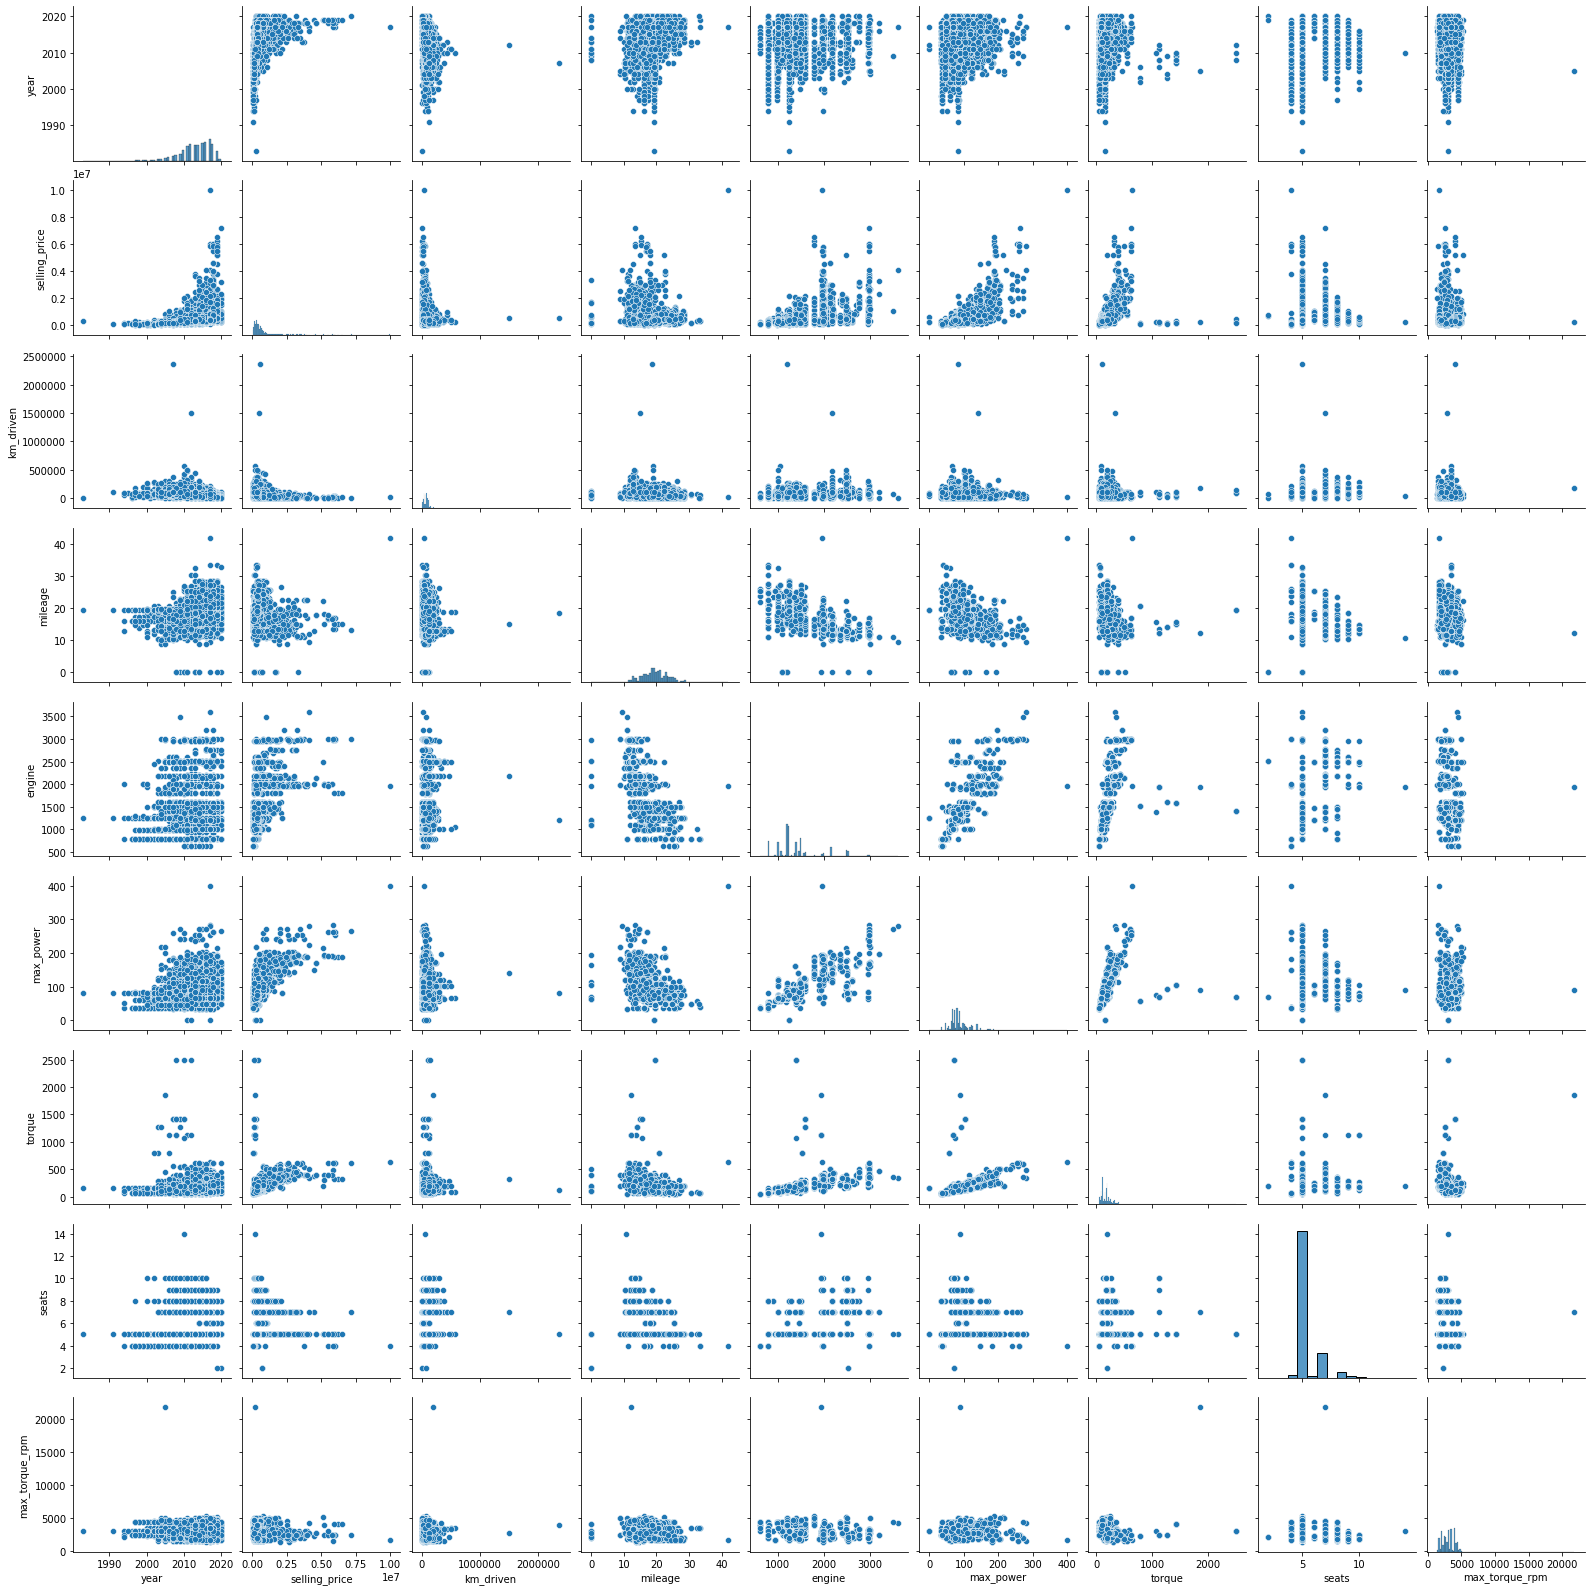

In [58]:
sns.pairplot(df_train);

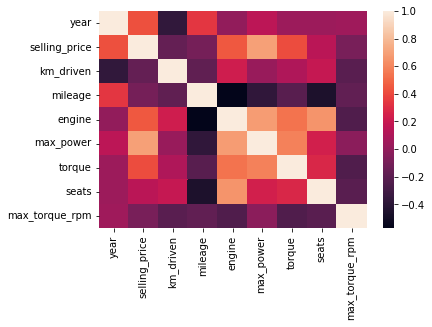

In [59]:
sns.heatmap(df_train.corr());

In [60]:
df_train.corr()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.156858,0.039296,0.041178,0.048201
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692814,0.413603,0.149953,-0.088871
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024588,0.108353,0.192328,-0.204476
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.373390,-0.212754,-0.451059,-0.179449
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681117,0.538086,0.652172,-0.246244
max_power,0.156858,0.692814,0.024588,-0.373390,0.681117,1.000000,0.586641,0.244112,-0.021635
torque,0.039296,0.413603,0.108353,-0.212754,0.538086,0.586641,1.000000,0.279446,-0.242035
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244112,0.279446,1.000000,-0.207532
max_torque_rpm,0.048201,-0.088871,-0.204476,-0.179449,-0.246244,-0.021635,-0.242035,-0.207532,1.000000


Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**Ответ 1**: есть признаки, которые имеют линейную зависимость с целевой переменной (самый большой коэффициент корреляции = 0.69, т.е. супер большой линейной зависимости между признаками и целевой переменной нет), если признаки, которые ее не имеют, но можно попробовать найти нелинейную зависимость.  
**Ответ 2**: есть пары скоррелированных признаков, однако коэффициент кореляции выше 0.7 не поднимается => больших проблем с мультиколлинеарностью не должно возникнуть. До 0.7 не такая уж большая корреляция считается.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

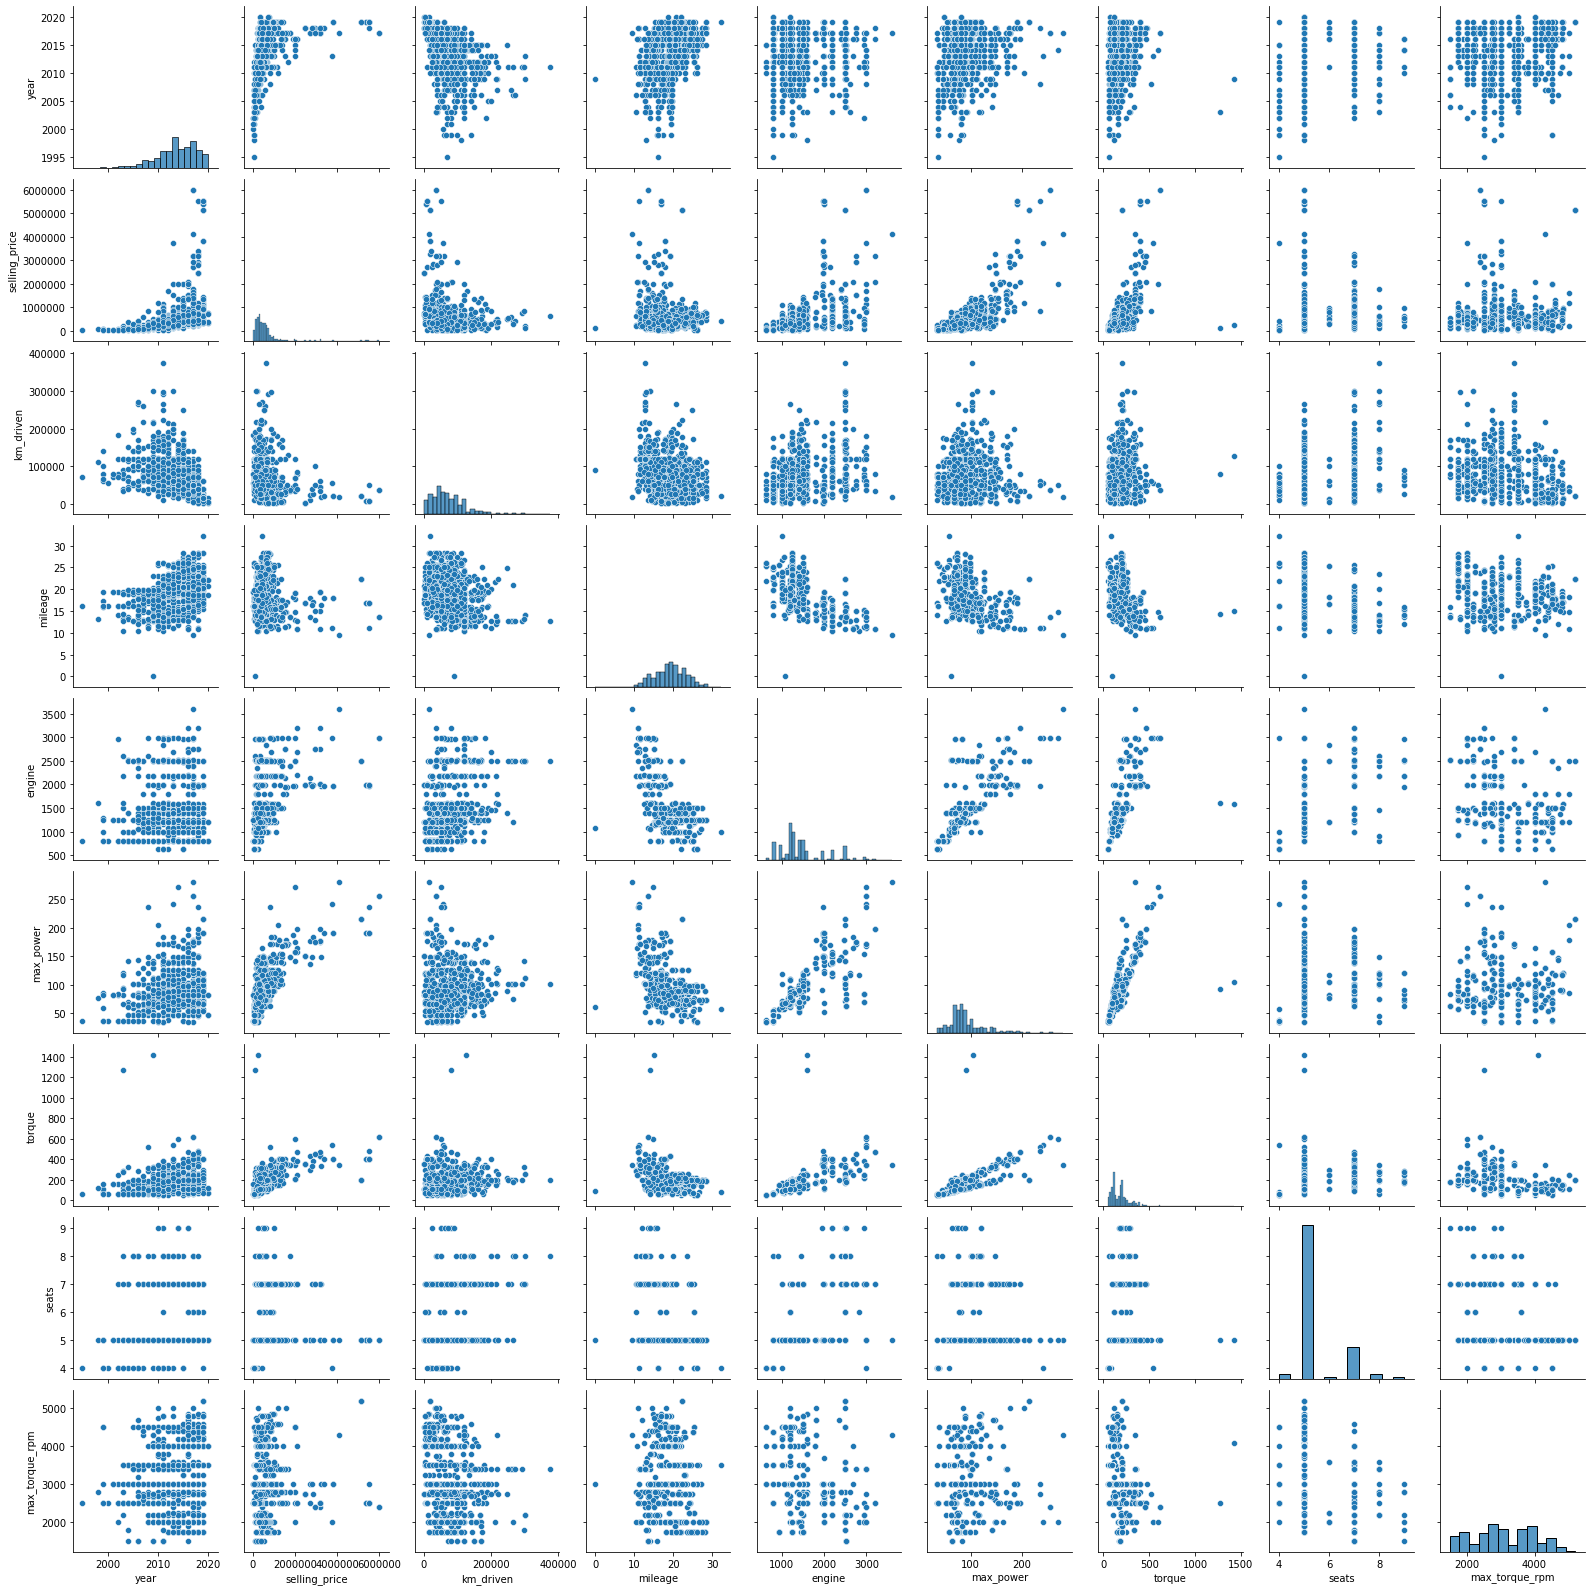

In [61]:
sns.pairplot(df_test);

**Ответ**: по каким то признакам - да, по каким то - не очень. Но в большинстве случаев похожи.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

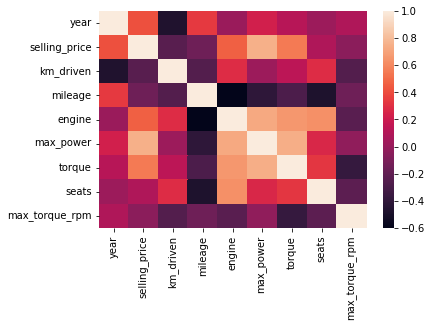

In [62]:
sns.heatmap(df_test.corr());

In [63]:
df_test.corr()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.416422,-0.469142,0.341303,0.013145,0.229108,0.119760,0.019283,0.090733
selling_price,0.416422,1.000000,-0.235824,-0.150291,0.468086,0.750955,0.549746,0.086948,-0.044327
km_driven,-0.469142,-0.235824,1.000000,-0.256958,0.289379,0.022792,0.140633,0.286780,-0.254862
mileage,0.341303,-0.150291,-0.256958,1.000000,-0.601812,-0.404712,-0.281422,-0.474142,-0.145992
engine,0.013145,0.468086,0.289379,-0.601812,1.000000,0.726953,0.661745,0.634820,-0.231647
max_power,0.229108,0.750955,0.022792,-0.404712,0.726953,1.000000,0.746639,0.262978,-0.021766
torque,0.119760,0.549746,0.140633,-0.281422,0.661745,0.746639,1.000000,0.330320,-0.371499
seats,0.019283,0.086948,0.286780,-0.474142,0.634820,0.262978,0.330320,1.000000,-0.217487
max_torque_rpm,0.090733,-0.044327,-0.254862,-0.145992,-0.231647,-0.021766,-0.371499,-0.217487,1.000000


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

**Ответ1**: есть две пары признаков, которые примерно одинаково мало скореллированы. Это `year и engine` и `year и seats`.  
**Ответ2**: ecть две пары признаков, которые примерно одинаково сильно положительно скореллированы. Это `max_power и selling_price` (это не в счет, потому что selling_price - целевая переменная) и `max_power и engine`.  
**Ответ3**: исходя из графика рассеивания (sns.pairplot) такого вывода сделать нельзя. Наоборот, `mileage` даже стал больше в последние года (более поздние). 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

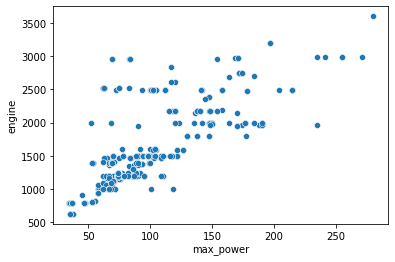

In [64]:
sns.scatterplot(x='max_power', y='engine', data=df_test);

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [65]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [66]:
y_train = df_train['selling_price']
X_train = df_train.drop('selling_price', axis=1)

In [67]:
cat_features_mask = (X_train.dtypes == "object").values # категориальные признаки имеют тип "object"

# остаются номера колоном, где cat_features_mask == False
X_train.columns[~cat_features_mask]

X_real = X_train[X_train.columns[~cat_features_mask]]
X_real.dtypes

year                int64
km_driven           int64
mileage           float64
engine              int32
max_power         float64
torque            float64
seats               int32
max_torque_rpm    float64
dtype: object

In [68]:
#assert X_train.shape == (5840, 6)
assert X_real.shape == (5840, 8)

In [69]:
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1)

In [70]:
cat_features_mask = (X_test.dtypes == "object").values # категориальные признаки имеют тип "object"

# остаются номера колоном, где cat_features_mask == False
X_test.columns[~cat_features_mask]

X_real_t = X_test[X_test.columns[~cat_features_mask]]
X_real_t.dtypes

year                int64
km_driven           int64
mileage           float64
engine              int32
max_power         float64
torque            float64
seats               int32
max_torque_rpm    float64
dtype: object

In [71]:
#assert X_test.shape == (1000, 6)
assert X_real_t.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_real, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_real_t)

test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, model.predict(X_real))
test_mse = MSE(y_test, y_pred)
train_mse = MSE(y_train, model.predict(X_real))

In [74]:
print(f'R^2 на train {train_r2}.')
print(f'R^2 на test {test_r2}.')
print(f'MSE на train {train_mse}.')
print(f'MSE на test {test_mse}.')

R^2 на train 0.6010552547524941.
R^2 на test 0.6003505684714185.
MSE на train 114352858874.35544.
MSE на test 229729905487.29987.


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [76]:
scaler.fit(X_real)
X_real_stand = scaler.transform(X_real)
X_real_t_stand = scaler.transform(X_real_t)
X = pd.DataFrame(data=X_real_stand )
X_t = pd.DataFrame(data=X_real_t_stand)

In [77]:
model = LinearRegression()
model.fit(X, y_train)

y_pred = model.predict(X_t)

test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, model.predict(X))
test_mse = MSE(y_test, y_pred)
train_mse = MSE(y_train, model.predict(X))

In [78]:
print(f'R^2 на train {train_r2}.')
print(f'R^2 на test {test_r2}.')
print(f'MSE на train {train_mse}.')
print(f'MSE на test {test_mse}.')

R^2 на train 0.6010552547524929.
R^2 на test 0.6003505684714214.
MSE на train 114352858874.3558.
MSE на test 229729905487.29822.


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [79]:
print(model.intercept_)
model.coef_

522960.0910958864


array([165493.53492009, -48976.20422322,  -8094.86024599,  22749.42190786,
       329567.71735858,   7154.62102293, -30262.06551958, -58840.70393287])

**Ответ**: наиболее информативным оказался max_power (5тый коэффициент самый большой). В принципе это подтверждается и корреляцией. У max_power в тагретом самый большой коэффициент корреляции.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [80]:
from sklearn.linear_model import Lasso

model_l1_1 = Lasso()
model_l1 = model_l1_1.fit(X, y_train)
y_pred_l1 = model_l1.predict(X_t)

In [81]:
test_r2 = r2_score(y_test, y_pred_l1)
train_r2 = r2_score(y_train, model_l1.predict(X))
test_mse = MSE(y_test, y_pred_l1)
train_mse = MSE(y_train, model_l1.predict(X))

print(f'R^2 на train {train_r2}.')
print(f'R^2 на test {test_r2}.')
print(f'MSE на train {train_mse}.')
print(f'MSE на test {test_mse}.')

R^2 на train 0.6010552547048542.
R^2 на test 0.600349285142398.
MSE на train 114352858888.01085.
MSE на test 229730643181.46713.


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [82]:
print(model_l1.intercept_)
model_l1.coef_

522960.0910958864


array([165491.3350896 , -48975.25819418,  -8091.5776288 ,  22747.41347113,
       329569.08727379,   7153.96925569, -30258.08925381, -58838.61287378])

**Ответ**: L1-регуляризация не занулила веса, потому что L1 призвана занулять маленькие веса, а у нас в модели они очень большие.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [83]:
from sklearn.model_selection import GridSearchCV
import time

In [84]:
start = time.time()

# Подбор гиперпараметра alpha (параметр регуляризации)
# создаем словарь из параметров
params = {'alpha': np.arange(0.1,1.1,0.1)}
# Объявили модель
grid_model_l101 = GridSearchCV(model_l1_1,
                               params,
                               cv=10,
                               verbose=1,
                               #scoring='neg_mean_squared_error')
                               scoring='r2')
# Обучили модель
grid_model_l1 = grid_model_l101.fit(X, y_train)
print('best score mse by Lasso regression:', grid_model_l1.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by Lasso regression:', grid_model_l1.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'alpha'

print(time.time() - start)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
best score mse by Lasso regression: 0.5746822146207966
best params by Lasso regression: {'alpha': 1.0}
1.3794996738433838


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

**Ответ**: по времени 0.877 секунд, по кол-ву моделей - 100 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

**Ответ1**: оптимальный alpha = 1

In [85]:
model_l1_1 = Lasso(alpha=1)
model_l1 = model_l1_1.fit(X, y_train)

print(model_l1.intercept_)
model_l1.coef_

522960.0910958864


array([165491.3350896 , -48975.25819418,  -8091.5776288 ,  22747.41347113,
       329569.08727379,   7153.96925569, -30258.08925381, -58838.61287378])

**Ответ 2**: нет, не занулились. Они все равно большие.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [86]:
from sklearn.linear_model import ElasticNet

model_elast = ElasticNet()

In [87]:
start = time.time()

# создаем словарь из параметров
params = {'alpha': np.arange(0.1,1.1,0.1), 'l1_ratio': np.arange(0.1,1.1,0.1)}
# Объявили модель
grid_model_elast01 = GridSearchCV(model_elast,
                               params,
                               cv=10,
                               #scoring='neg_mean_squared_error')
                               scoring='r2')
# Обучили модель
grid_model_elast = grid_model_elast01.fit(X, y_train)
print('best score mse by ElasticNet regression:', grid_model_elast.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by ElasticNet regression:', grid_model_elast.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'alpha'
    
print(time.time() - start)

best score mse by ElasticNet regression: 0.5808705237683688
best params by ElasticNet regression: {'alpha': 1.0, 'l1_ratio': 0.9}
10.879000186920166


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

**Ответ**: alpha=1, l1_ratio = 0.9. Изменилось не сильно.

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [88]:
y_train = df_train['selling_price']
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)

y_test = df_test['selling_price']
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

In [89]:
#assert X_train_cat.shape == (5840, 10)
assert X_train_cat.shape == (5840, 12)

In [90]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [91]:
X_test_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,534,837,877,623


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [92]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_dum_v01 = pd.get_dummies(X_train_cat, drop_first=True)
X_dum = pd.get_dummies(X_dum_v01, drop_first=True, columns=['seats'])

print(X_dum.shape)
X_dum.head()

(5840, 25)


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,190.00,2000.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2014,120000,21.14,1498,103.52,250.00,2500.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2010,127000,23.00,1396,90.00,219.52,2750.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2007,120000,16.10,1298,88.20,112.70,4500.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,2017,45000,20.14,1197,81.86,113.75,4000.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [93]:
X_num = X_dum.columns[:7]
X_cat = X_dum.columns[7:]
X_dum_v01 = X_dum[X_num]
X_cat_v01 = X_dum[X_cat]
X_dum_v01.head()

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm
0,2014,145500,23.40,1248,74.00,190.00,2000.0
1,2014,120000,21.14,1498,103.52,250.00,2500.0
2,2010,127000,23.00,1396,90.00,219.52,2750.0
3,2007,120000,16.10,1298,88.20,112.70,4500.0
4,2017,45000,20.14,1197,81.86,113.75,4000.0


In [94]:
# стандартизируем вещественные признаки
scaler = StandardScaler()

scaler.fit(X_dum_v01)
X_real_stand = scaler.transform(X_dum_v01)
X_num_real_stand = pd.DataFrame(data=X_real_stand, columns=X_dum_v01.columns )
X_num_real_stand.head()

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.112594,-1.148027
1,0.139570,0.766619,0.428830,0.141162,0.493513,0.615310,-0.599730
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,0.359930,-0.325581
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.535072,1.593458
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.526275,1.045161


In [95]:
X_dum_01 = pd.concat([X_num_real_stand, X_cat_v01], axis=1)
X_dum_01.head()

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.112594,-1.148027,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.139570,0.766619,0.428830,0.141162,0.493513,0.615310,-0.599730,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,0.359930,-0.325581,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.535072,1.593458,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.526275,1.045161,0,0,1,...,0,0,0,1,0,0,0,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [96]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_ridge = Ridge()

In [97]:
start = time.time()
# БЕЗ МАСШТАБИРОВАНИЯ ПРИЗНАКОВ

# создаем словарь из параметров
params = {'alpha': np.arange(0.1,1.1,0.1)}
# Объявили модель
grid_model_ridge01 = GridSearchCV(model_ridge,
                               params,
                               cv=10,
                               #scoring='neg_mean_squared_error')
                               scoring='r2')
# Обучили модель
grid_model_ridge = grid_model_ridge01.fit(X_dum, y_train)
print('best score mse by ridge regression:', grid_model_ridge.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by ridge regression:', grid_model_ridge.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'alpha'

print(time.time() - start)

best score mse by ridge regression: 0.6252881250635445
best params by ridge regression: {'alpha': 1.0}
1.8675000667572021


In [98]:
start = time.time()
# С МАСШТАБИРОВАНИЕМ ПРИЗНАКОВ

# создаем словарь из параметров
params = {'alpha': np.arange(0.1,1.1,0.1)}
# Объявили модель
grid_model_ridge01 = GridSearchCV(model_ridge,
                               params,
                               cv=10,
                               #scoring='neg_mean_squared_error')
                               scoring='r2')
# Обучили модель
grid_model_ridge = grid_model_ridge01.fit(X_dum_01, y_train)
print('best score mse by ridge regression:', grid_model_ridge.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by ridge regression:', grid_model_ridge.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'alpha'

print(time.time() - start)

best score mse by ridge regression: 0.6253077893826755
best params by ridge regression: {'alpha': 1.0}
2.440000057220459


**Ответ**: качество не особо улучшилось

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

**`пункт 1 `**

In [99]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.52,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.70,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4000.0


In [100]:
# train
df_train['year_sq'] = df_train['year'] ** 2

age_of_car = (datetime.datetime.now().year - df_train['year']) + 1
df_train['km_driven_per_year'] = df_train['km_driven'] / age_of_car
df_train['specific power'] = df_train['max_power'] / df_train['engine']

In [101]:
# test
df_test['year_sq'] = df_test['year'] ** 2

age_of_car = (datetime.datetime.now().year - df_test['year']) + 1
df_test['km_driven_per_year'] = df_test['km_driven'] / age_of_car
df_test['specific power'] = df_test['max_power'] / df_test['engine']

**`пункт 2 `**

In [102]:
# достанем название компани из названия машины (оно идет всегда 1м словом)

company = []
for i in range(len(df_train)):
    comp = df_train['name'][i].split()[0]
    company.append(comp)

df_train['company'] = company

In [103]:
pd.set_option('display.max_rows', None)
df_train['company'].value_counts()

Maruti           1804
Hyundai          1058
Mahindra          611
Tata              534
Toyota            309
Ford              308
Honda             308
Chevrolet         188
Renault           171
Volkswagen        153
Nissan             63
Skoda              61
Datsun             49
Mercedes-Benz      44
BMW                41
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Volvo               8
Jaguar              7
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Peugeot             1
Name: company, dtype: int64

In [104]:
pd.set_option('display.max_rows', 10)

In [105]:
list_comp = ['Mitsubishi', 'Volvo', 'Jaguar', 'Force', 'Isuzu', 'Land', 'MG', 'Daewoo', 'Kia', 'Ambassador', 'Lexus', 'Peugeot']

In [106]:
for i in range(len(df_train)):
    if df_train['company'][i] in list_comp:
        df_train.loc[i, 'company'] = 'other'

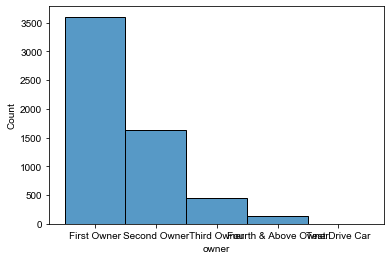

In [107]:
sns.histplot(df_train['owner'])
sns.set(rc={'figure.figsize':(5,5)});

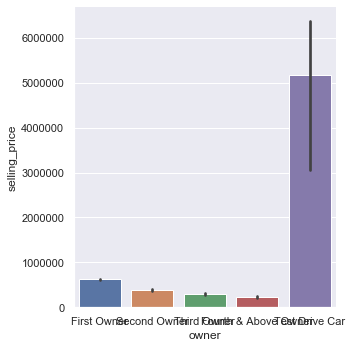

In [108]:
sns.catplot(x='owner', y='selling_price', data=df_train, kind='bar');

In [109]:
# сделаем пороговый столбец - 1вый владелец и 2 и более

owner_2 = []
for i in range(len(df_train)):
    if (df_train['owner'][i] == 'First Owner') or (df_train['owner'][i] == 'Test Drive Car'):
        owner_2.append('First Owner & Test Drive Car')
    else:
        owner_2.append('Second & Above Owner')
        
df_train['owner_2'] = owner_2

In [110]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,year_sq,km_driven_per_year,specific power,company,owner_2
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2000.0,4056196,16166.666667,0.059295,Maruti,First Owner & Test Drive Car
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,2500.0,4056196,13333.333333,0.069105,Skoda,Second & Above Owner
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.52,5,2750.0,4040100,9769.230769,0.064470,Hyundai,First Owner & Test Drive Car
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.70,5,4500.0,4028049,7500.000000,0.067951,Maruti,First Owner & Test Drive Car
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4000.0,4068289,7500.000000,0.068388,Hyundai,First Owner & Test Drive Car


In [111]:
company = []
for i in range(len(df_test)):
    comp = df_test['name'][i].split()[0]
    company.append(comp)

df_test['company'] = company

for i in range(len(df_test)):
    if df_test['company'][i] in list_comp:
        df_test.loc[i, 'company'] = 'other'
        
# сделаем пороговый столбец - 1вый владелец и 2 и более

owner_2 = []
for i in range(len(df_test)):
    if (df_test['owner'][i] == 'First Owner') or (df_test['owner'][i] == 'Test Drive Car'):
        owner_2.append('First Owner & Test Drive Car')
    else:
        owner_2.append('Second & Above Owner')
        
df_test['owner_2'] = owner_2

**Построим модели**

In [112]:
y_train = df_train['selling_price']
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)

X_dum_v01 = pd.get_dummies(X_train_cat, drop_first=True)
X_dum = pd.get_dummies(X_dum_v01, drop_first=True, columns=['seats'])

print(X_dum.shape)
X_dum.head()

(5840, 47)


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,year_sq,km_driven_per_year,specific power,...,company_other,owner_2_Second & Above Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,190.00,2000.0,4056196,16166.666667,0.059295,...,0,0,0,1,0,0,0,0,0,0
1,2014,120000,21.14,1498,103.52,250.00,2500.0,4056196,13333.333333,0.069105,...,0,1,0,1,0,0,0,0,0,0
2,2010,127000,23.00,1396,90.00,219.52,2750.0,4040100,9769.230769,0.064470,...,0,0,0,1,0,0,0,0,0,0
3,2007,120000,16.10,1298,88.20,112.70,4500.0,4028049,7500.000000,0.067951,...,0,0,0,1,0,0,0,0,0,0
4,2017,45000,20.14,1197,81.86,113.75,4000.0,4068289,7500.000000,0.068388,...,0,0,0,1,0,0,0,0,0,0


In [113]:
X_num = X_dum.columns[:10]
X_cat = X_dum.columns[10:]
X_dum_v01 = X_dum[X_num]
X_cat_v01 = X_dum[X_cat]

# стандартизируем вещественные признаки
scaler = StandardScaler()

scaler.fit(X_dum_v01)
X_real_stand = scaler.transform(X_dum_v01)
X_num_real_stand = pd.DataFrame(data=X_real_stand, columns=X_dum_v01.columns )
X_num_real_stand.head()

X_dum_01 = pd.concat([X_num_real_stand, X_cat_v01], axis=1)
pd.set_option('display.max_columns', None)
X_dum_01.head()

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,year_sq,km_driven_per_year,specific power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Ford,company_Honda,company_Hyundai,company_Jeep,company_Mahindra,company_Maruti,company_Mercedes-Benz,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_other,owner_2_Second & Above Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.112594,-1.148027,0.138716,1.563079,-0.273186,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.139570,0.766619,0.428830,0.141162,0.493513,0.615310,-0.599730,0.138716,1.029945,0.524628,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,0.359930,-0.325581,-0.838339,0.359307,0.147657,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.535072,1.593458,-1.569855,-0.067683,0.430719,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.526275,1.045161,0.872782,-0.067683,0.466252,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [114]:
# ОТМАСШТАБИРОВАННЫЕ ПРИЗНАКИ
model_ridge = Ridge()

# создаем словарь из параметров
params = {'alpha': np.arange(0.1,1.1,0.1)}
# Объявили модель
grid_model_ridge01 = GridSearchCV(model_ridge,
                               params,
                               cv=10,
                               #scoring='neg_mean_squared_error')
                               scoring='r2')
# Обучили модель
grid_model_ridge = grid_model_ridge01.fit(X_dum_01, y_train)
print('best score mse by ridge regression:', grid_model_ridge.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by ridge regression:', grid_model_ridge.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'alpha'

best score mse by ridge regression: 0.7091041265335043
best params by ridge regression: {'alpha': 0.1}


In [115]:
# НЕОТМАСШТАБИРОВАННЫЕ ПРИЗНАКИ
model_ridge = Ridge()

# создаем словарь из параметров
params = {'alpha': np.arange(0.1,1.1,0.1)}
# Объявили модель
grid_model_ridge01 = GridSearchCV(model_ridge,
                               params,
                               cv=10,
                               #scoring='neg_mean_squared_error')
                               scoring='r2')
# Обучили модель
grid_model_ridge = grid_model_ridge01.fit(X_dum, y_train)
print('best score mse by ridge regression:', grid_model_ridge.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by ridge regression:', grid_model_ridge.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'alpha'

best score mse by ridge regression: 0.7230344020865525
best params by ridge regression: {'alpha': 0.1}


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [116]:
def business_metrics(y_true, y_pred):
    mistake = abs(y_true - y_pred)
    share = y_true * 0.1
    total = len(y_true)
    critical = []
    
    for i in range(len(y_true)):
        if mistake[i] < share[i]:
            critical.append(i)
    
    metrics = len(critical) / total
    
    return metrics

In [117]:
#business_metrics(y_test, y_pred_ridge)

___

In [118]:
X_train.columns[cat_features_mask]

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [119]:
X_train.columns[~cat_features_mask]

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

In [120]:
X_cat = X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]
X_cat_t = X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]
X_real = X_train_cat[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']]
X_real_t = X_test_cat[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']]

In [121]:
one_hot_enc = OneHotEncoder(drop='first')

one_hot_enc.fit(X_cat)

OneHotEncoder(drop='first')

In [122]:
one_hot_enc.categories_

[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object),
 array([ 2,  4,  5,  6,  7,  8,  9, 10, 14])]

In [123]:
names_of_cat = ['Diesel', 'LPG', 'Petrol', 'Individual', 'Trustmark Dealer', 'Manual', \
               'Fourth & Above Owner', 'Second Owner', 'Test Drive Car', 'Third Owner', \
                '4',  '5',  '6',  '7',  '8',  '9', '10', '14']

In [124]:
X_dum01 = one_hot_enc.transform(X_cat)

X_dum_train = pd.DataFrame(X_dum01.toarray(), columns=names_of_cat)
X_dum_train.head()

,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,4,5,6,7,8,9,10,14
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
X_dum01_t = one_hot_enc.transform(X_cat_t)

X_dum_test = pd.DataFrame(X_dum01_t.toarray(), columns=names_of_cat)
X_dum_test.head()

,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,4,5,6,7,8,9,10,14
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
X_dum = pd.concat([X_real, X_dum_train], axis=1)
X_dum_t = pd.concat([X_real_t, X_dum_test], axis=1)

In [127]:
X_dum_t

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,4,5,6,7,8,9,10,14
0,2010,168000,14.00,2498,112.00,260.00,2200.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017,25000,21.50,1497,108.50,260.00,2750.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,218463,12.90,1799,130.00,172.00,4300.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,173000,25.10,1498,98.60,200.00,1750.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,70000,16.50,1172,65.00,96.00,3000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,99.04,4500.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
996,2017,50000,18.60,1197,81.83,114.70,4000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,2009,40000,23.00,1396,90.00,219.52,2750.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,2012,25000,20.36,1197,78.90,111.80,4000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
# one_hot_enc.fit(X_real)
# X_real_stand = scaler.transform(X_real)
# X_real_t_stand = scaler.transform(X_real_t)
# X = pd.DataFrame(data=X_real_stand )
# X_t = pd.DataFrame(data=X_real_t_stand)

In [129]:
# y_test = df_test['selling_price']
# X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

# X_dum_v01_t = pd.get_dummies(X_test_cat, drop_first=True)
# X_dum_t = pd.get_dummies(X_dum_v01_t, drop_first=True, columns=['seats'])

# print(X_dum_t.shape)
# X_dum_t.head()

In [130]:
# НЕОТМАСШТАБИРОВАННЫЕ ПРИЗНАКИ
model_ridge_1 = Ridge(alpha=1)
model_ridge = model_ridge_1.fit(X_dum, y_train)
y_pred_ridge = model_ridge.predict(X_dum_t)

test_r2 = r2_score(y_test, y_pred_ridge)
train_r2 = r2_score(y_train, model_ridge.predict(X_dum))

print(f'R^2 на train {train_r2}.')
print(f'R^2 на test {test_r2}.')

R^2 на train 0.672658317260969.
R^2 на test 0.6407251573241051.


In [131]:
bm = business_metrics(y_test, y_pred_ridge)
print(f'Бизнесовая темрика = {bm}.')

Бизнесовая темрика = 0.244.


In [132]:
# ОТМАСШТАБИРУЕМ ВЕЩЕСТВЕННЫЕ ПРИЗНАКИ

In [133]:
# train
X_num = X_dum.columns[:7]
X_cat = X_dum.columns[7:]
X_dum_v01 = X_dum[X_num]
X_cat_v01 = X_dum[X_cat]

# стандартизируем вещественные признаки
scaler = StandardScaler()

scaler.fit(X_dum_v01)
X_real_stand = scaler.transform(X_dum_v01)
X_num_real_stand = pd.DataFrame(data=X_real_stand, columns=X_dum_v01.columns )

X_dum_01 = pd.concat([X_num_real_stand, X_cat_v01], axis=1)
X_dum_01.head()

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,4,5,6,7,8,9,10,14
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.112594,-1.148027,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.139570,0.766619,0.428830,0.141162,0.493513,0.615310,-0.599730,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,0.359930,-0.325581,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.535072,1.593458,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.526275,1.045161,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
# test
X_num_t = X_dum_t.columns[:7]
X_cat_t = X_dum_t.columns[7:]
X_dum_v01_t = X_dum_t[X_num_t]
X_cat_v01_t = X_dum_t[X_cat_t]

# стандартизируем вещественные признаки
scaler = StandardScaler()

scaler.fit(X_dum_v01_t)
X_real_stand_t = scaler.transform(X_dum_v01_t)
X_num_real_stand_t = pd.DataFrame(data=X_real_stand_t, columns=X_dum_v01_t.columns )

X_dum_01_t = pd.concat([X_num_real_stand_t, X_cat_v01_t], axis=1)
X_dum_01_t.head()

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,4,5,6,7,8,9,10,14
0,-0.917923,1.993453,-1.351675,1.999338,0.606674,0.794825,-1.024678,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.827651,-0.957314,0.547168,0.080738,0.506318,0.794825,-0.398330,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.666026,3.034744,-1.630172,0.659577,1.122789,-0.054105,1.366832,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.328916,2.096627,1.458613,0.082655,0.222455,0.216009,-1.537144,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.668555,-0.028751,-0.718727,-0.542184,-0.740960,-0.787272,-0.113626,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# ОТМАСШТАБИРОВАННЫЕ ПРИЗНАКИ
model_ridge_1 = Ridge(alpha=1)
model_ridge = model_ridge_1.fit(X_dum_01, y_train)
y_pred_ridge = model_ridge.predict(X_dum_01_t)

test_r2 = r2_score(y_test, y_pred_ridge)
train_r2 = r2_score(y_train, model_ridge.predict(X_dum_01))

print(f'R^2 на train {train_r2}.')
print(f'R^2 на test {test_r2}.')

R^2 на train 0.6726587195965218.
R^2 на test 0.6182356465689045.


In [136]:
bm = business_metrics(y_test, y_pred_ridge)
print(f'Бизнесовая метрика = {bm}.')

Бизнесовая метрика = 0.22.


**Модель из Feature Engineering**

In [137]:
import pickle

In [138]:
cat_features_mask_v2 = (df_train.dtypes == "object").values

In [139]:
df_train.columns[cat_features_mask_v2]

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company',
       'owner_2'],
      dtype='object')

In [140]:
df_train.columns[~cat_features_mask_v2]

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm', 'year_sq', 'km_driven_per_year',
       'specific power'],
      dtype='object')

Один из недостатков оne hot Encoding является то, что при встрече в новой категорией он не будет знать, что с ней делать. Для этого при объявлении модели поставить handle_unknown='ignore'. Тогда при встрече с новыми категориями он буд

In [141]:
X_cat = df_train[['fuel', 'seller_type', 'transmission', 'owner', 'company','owner_2','seats']]
X_cat_t = df_test[['fuel', 'seller_type', 'transmission', 'owner', 'company','owner_2', 'seats']]
X_real = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'year_sq', 'km_driven_per_year','specific power']]
X_real_t = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'year_sq', 'km_driven_per_year','specific power']]

one_hot_enc = OneHotEncoder(drop='first', handle_unknown='ignore')
one_hot_enc.fit(X_cat)
one_hot_enc.categories_

[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object),
 array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda',
        'Hyundai', 'Jeep', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Nissan',
        'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'other'],
       dtype=object),
 array(['First Owner & Test Drive Car', 'Second & Above Owner'],
       dtype=object),
 array([ 2,  4,  5,  6,  7,  8,  9, 10, 14])]

In [142]:
pkl_filename = "pickle_encoder.pkl" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(one_hot_enc, file) 

In [143]:
# with open(pkl_filename, 'rb') as file: 
#     pickle_model = pickle.load(file) 

In [144]:
# pickle_model

In [145]:
names_of_cat = []
for i in range(len(one_hot_enc.categories_)):
    for j in range(1, len(one_hot_enc.categories_[i])):
        names_of_cat.append(one_hot_enc.categories_[i][j])

In [146]:
X_dum01 = one_hot_enc.transform(X_cat)

X_dum_train = pd.DataFrame(X_dum01.toarray(), columns=names_of_cat)
X_dum01_t = one_hot_enc.transform(X_cat_t)
X_dum_test = pd.DataFrame(X_dum01_t.toarray(), columns=names_of_cat)

X_dum = pd.concat([X_real, X_dum_train], axis=1)
X_dum_t = pd.concat([X_real_t, X_dum_test], axis=1)

X_dum_t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,year_sq,km_driven_per_year,specific power,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,BMW,Chevrolet,Datsun,Fiat,Ford,Honda,Hyundai,Jeep,Mahindra,Maruti,Mercedes-Benz,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,other,Second & Above Owner,4,5,6,7,8,9,10,14
0,2010,168000,14.00,2498,112.00,260.00,2200.0,4040100,12923.076923,0.044836,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017,25000,21.50,1497,108.50,260.00,2750.0,4068289,4166.666667,0.072478,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,218463,12.90,1799,130.00,172.00,4300.0,4028049,13653.937500,0.072262,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,173000,25.10,1498,98.60,200.00,1750.0,4060225,21625.000000,0.065821,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,70000,16.50,1172,65.00,96.00,3000.0,4044121,5833.333333,0.055461,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,99.04,4500.0,4032064,6666.666667,0.062661,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
996,2017,50000,18.60,1197,81.83,114.70,4000.0,4068289,8333.333333,0.068363,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,2009,40000,23.00,1396,90.00,219.52,2750.0,4036081,2857.142857,0.064470,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,2012,25000,20.36,1197,78.90,111.80,4000.0,4048144,2272.727273,0.065915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
# train
X_num = X_dum.columns[:10]
X_cat = X_dum.columns[10:]
X_dum_v01 = X_dum[X_num]
X_cat_v01 = X_dum[X_cat]

# стандартизируем вещественные признаки
scaler = StandardScaler()

scaler.fit(X_dum_v01)
X_real_stand = scaler.transform(X_dum_v01)
X_num_real_stand = pd.DataFrame(data=X_real_stand, columns=X_dum_v01.columns )

X_dum_01 = pd.concat([X_num_real_stand, X_cat_v01], axis=1)
X_dum_01.head()


# test
X_num_t = X_dum_t.columns[:10]
X_cat_t = X_dum_t.columns[10:]
X_dum_v01_t = X_dum_t[X_num_t]
X_cat_v01_t = X_dum_t[X_cat_t]

# стандартизируем вещественные признаки
scaler = StandardScaler()

scaler.fit(X_dum_v01_t)
X_real_stand_t = scaler.transform(X_dum_v01_t)
X_num_real_stand_t = pd.DataFrame(data=X_real_stand_t, columns=X_dum_v01_t.columns )

X_dum_01_t = pd.concat([X_num_real_stand_t, X_cat_v01_t], axis=1)
X_dum_01_t.head()

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,year_sq,km_driven_per_year,specific power,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,BMW,Chevrolet,Datsun,Fiat,Ford,Honda,Hyundai,Jeep,Mahindra,Maruti,Mercedes-Benz,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,other,Second & Above Owner,4,5,6,7,8,9,10,14
0,-0.917923,1.993453,-1.351675,1.999338,0.606674,0.794825,-1.024678,-0.919012,1.135183,-1.519872,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.827651,-0.957314,0.547168,0.080738,0.506318,0.794825,-0.398330,0.828179,-0.769910,0.740527,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.666026,3.034744,-1.630172,0.659577,1.122789,-0.054105,1.366832,-1.665949,1.294194,0.722870,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.328916,2.096627,1.458613,0.082655,0.222455,0.216009,-1.537144,0.328361,3.028423,0.196149,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.668555,-0.028751,-0.718727,-0.542184,-0.740960,-0.787272,-0.113626,-0.669786,-0.407301,-0.651046,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
pkl_filename = "pickle_scaler.pkl" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(scaler, file) 

In [149]:
# НЕОТМАСШТАБИРОВАННЫЕ ПРИЗНАКИ
model_ridge_1 = Ridge(alpha=1)
model_ridge = model_ridge_1.fit(X_dum, y_train)
y_pred_ridge = model_ridge.predict(X_dum_t)

test_r2 = r2_score(y_test, y_pred_ridge)
train_r2 = r2_score(y_train, model_ridge.predict(X_dum))

print(f'R^2 на train {train_r2}.')
print(f'R^2 на test {test_r2}.')

bm = business_metrics(y_test, y_pred_ridge)
print(f'Бизнесовая метрика = {bm}.')

R^2 на train 0.7589010955348408.
R^2 на test 0.7505495258933327.
Бизнесовая метрика = 0.304.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int32', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int32', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int32', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [150]:
pkl_filename = "pickle_model_v02.pkl" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(model_ridge, file) 

In [151]:
y_pred_ridge

array([ 5.74967391e+05,  7.30773766e+05,  4.64999434e+05,  5.85900004e+05,
        1.73042259e+04,  9.42142019e+05,  2.69584754e+04,  3.21105683e+05,
        2.87256003e+04,  8.92544615e+05,  1.09192324e+06,  2.64242272e+06,
        8.51455393e+05,  1.55368151e+05,  6.76044001e+05,  2.61886763e+06,
        5.96239616e+05,  8.71179546e+04,  4.39087098e+05,  3.92915097e+05,
        3.18121002e+05,  7.82606940e+04,  8.39400960e+05,  5.63300674e+05,
        6.68656907e+05,  6.71182917e+05,  8.97136352e+05,  9.47391252e+05,
        3.94299834e+05,  5.65240185e+05,  1.09377162e+06,  9.21917843e+05,
        7.06894272e+05,  4.34307426e+05,  5.89870077e+05,  2.30530463e+05,
        5.94096603e+05,  1.99996615e+05,  4.90219034e+05,  8.16917671e+05,
        3.45945366e+05,  2.84329999e+05,  2.03955498e+05,  3.49247225e+05,
        3.34544548e+05,  3.05642146e+05,  2.04366990e+05,  1.49217663e+05,
        7.39573881e+05,  6.42457771e+05,  1.95115443e+05,  1.59287185e+05,
        7.63400102e+05,  

In [152]:
# ОТМАСШТАБИРОВАННЫЕ ПРИЗНАКИ
model_ridge_1 = Ridge(alpha=1)
model_ridge = model_ridge_1.fit(X_dum_01, y_train)
y_pred_ridge = model_ridge.predict(X_dum_01_t)

test_r2 = r2_score(y_test, y_pred_ridge)
train_r2 = r2_score(y_train, model_ridge.predict(X_dum_01))

print(f'R^2 на train {train_r2}.')
print(f'R^2 на test {test_r2}.')

R^2 на train 0.7562600112792986.
R^2 на test 0.7330545211311306.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int32', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int32', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int32', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [153]:
bm = business_metrics(y_test, y_pred_ridge)
print(f'Бизнесовая метрика = {bm}.')

Бизнесовая метрика = 0.279.


In [154]:
pkl_filename = "pickle_model.pkl" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(model_ridge, file) 

In [155]:
y_pred_ridge

array([ 5.29320640e+05,  6.68157678e+05,  3.90573460e+05,  5.39205943e+05,
        2.62405205e+04,  9.03528357e+05,  2.92177099e+04,  2.81137374e+05,
        5.15289522e+04,  8.12834303e+05,  1.01005028e+06,  2.58769997e+06,
        8.19116451e+05,  1.39598595e+05,  6.16802426e+05,  2.56813422e+06,
        5.75371515e+05,  8.69251168e+04,  4.23160133e+05,  3.82631816e+05,
        3.10183750e+05,  4.52491319e+04,  7.60745137e+05,  5.71733272e+05,
        6.66803203e+05,  6.32890491e+05,  8.17864618e+05,  8.93778097e+05,
        3.91736182e+05,  5.36980103e+05,  1.00766255e+06,  8.51921513e+05,
        6.57996786e+05,  4.01055066e+05,  5.50239810e+05,  1.84911941e+05,
        5.94061592e+05,  1.93050232e+05,  4.54766898e+05,  7.90712997e+05,
        3.31858713e+05,  3.02002948e+05,  1.93348955e+05,  3.43390064e+05,
        3.27568512e+05,  2.86839119e+05,  1.74902838e+05,  1.33973951e+05,
        7.29085258e+05,  5.92848754e+05,  1.87879147e+05,  1.42983338e+05,
        7.52598105e+05,  

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

**Комментарии**  
Так как в задании ничего не сказано по поводу заполнения пропусков, а в шаблонной части сервера исходя их BaseModel видно, что данных сервер не подразумевает подачу на вход пустых значений, относительно них было принято следующее решение: была предусмотрена ситуация, когда в числовых характеристиках* есть пропуски. В этом случае пропуски заполняются медианными значениями, которые были рассчитаны заранее на df_train. Пропуски в других столбцах (категориальных) не предусмотрены, так как в ноутбуке не ставилась задача обрабатывать пропуски на категориальных столбцах из-за их отсутствия.



*числовыми характеристиками будем считать все столбцы, который в конечной модели представляют вещественные признаки

In [156]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

ModuleNotFoundError: No module named 'fastapi'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link